### GroupBy Method 

In exploratory data analysis, we often would like to analyze data by some categories. In SQL, the GROUP BY statement groups row that has the same category values into summary rows. In Pandas, SQL’s GROUP BY operation is performed using the similarly named groupby() method. Pandas’ groupby() allows us to split data into separate groups to perform computations for better analysis.

In this article, you’ll learn the “group by” process (split-apply-combine) and how to use Pandas’s groupby() function to group data and perform operations. This article is structured as follows:

1. What is Pandas groupby() and how to access groups information?
2. The “group by” process: split-apply-combine
3. Aggregation
4. Transformation
5. Filtration
6. Grouping by multiple categories
7. Resetting index with as_index
8. Handling missing values

In [73]:
import pandas as pd
import numpy as np

In [74]:
df = pd.read_csv('titanic.csv')

In [75]:
df.head()

PassengerId  Survived  Pclass                                      Name  \
0          493         0       1                Molson, Mr. Harry Markland   
1           53         1       1  Harper, Mrs. Henry Sleeper (Myna Haxtun)   
2          388         1       2                          Buss, Miss. Kate   
3          192         0       2                     Carbines, Mr. William   
4          687         0       3                  Panula, Mr. Jaako Arnold   

      Sex   Age  SibSp  Parch    Ticket     Fare Cabin Embarked  
0    male  55.0      0      0    113787  30.5000   C30        S  
1  female  49.0      1      0  PC 17572  76.7292   D33        C  
2  female  36.0      0      0     27849  13.0000   NaN        S  
3    male  19.0      0      0     28424  13.0000   NaN        S  
4    male  14.0      4      1   3101295  39.6875   NaN        S

In [77]:
df['Age'].min()

0.42

## 1. What is Pandas groupby()

**What is Pandas groupby() and how to access groups information?**

The role of groupby() is anytime we want to analyze data by some categories. The simplest call must have a column name. In our example, let’s use the Sex column.

In [78]:
# It returns a DataFrameGroupBy object
df_groupby_sex = df.groupby('Sex')
type(df_groupby_sex)

pandas.core.groupby.generic.DataFrameGroupBy

In [79]:
# To get the number of groups
df_groupby_sex.ngroups

# len(df_groupby_sex)

2

In [80]:
# Stat of each group
df_groupby_sex.size()

Sex
female    256
male      456
dtype: int64

In [8]:
# Get groupby objects
df_groupby_sex.groups

{'female': [1, 2, 5, 8, 10, 21, 22, 25, 26, 27, 36, 41, 44, 47, 51, 58, 60, 65, 70, 71, 72, 76, 77, 78, 80, 87, 88, 93, 94, 95, 100, 102, 104, 105, 109, 113, 116, 119, 120, 121, 123, 129, 134, 138, 144, 146, 147, 148, 152, 157, 162, 166, 167, 168, 169, 171, 172, 174, 176, 178, 179, 180, 181, 182, 183, 189, 190, 192, 194, 198, 199, 201, 205, 207, 213, 221, 222, 226, 228, 229, 232, 235, 237, 240, 242, 243, 244, 252, 253, 255, 264, 265, 267, 269, 270, 279, 282, 284, 292, 294, ...], 'male': [0, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 42, 43, 45, 46, 48, 49, 50, 52, 53, 54, 55, 56, 57, 59, 61, 62, 63, 64, 66, 67, 68, 69, 73, 74, 75, 79, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 96, 97, 98, 99, 101, 103, 106, 107, 108, 110, 111, 112, 114, 115, 117, 118, 122, 124, 125, 126, 127, 128, 130, 131, 132, 133, 135, 136, 137, 139, 140, 141, 142, 143, ...]}

In [81]:
df_groupby_sex.first()

PassengerId  Survived  Pclass  \
Sex                                     
female           53         1       1   
male            493         0       1   

                                            Name   Age  SibSp  Parch  \
Sex                                                                    
female  Harper, Mrs. Henry Sleeper (Myna Haxtun)  49.0      1      0   
male                  Molson, Mr. Harry Markland  55.0      0      0   

          Ticket     Fare Cabin Embarked  
Sex                                       
female  PC 17572  76.7292   D33        C  
male      113787  30.5000   C30        S

In [82]:
df_groupby_sex.last()

PassengerId  Survived  Pclass                                   Name  \
Sex                                                                            
female          859         1       3  Baclini, Mrs. Solomon (Latifa Qurban)   
male            476         0       1            Clifford, Mr. George Quincy   

         Age  SibSp  Parch  Ticket     Fare            Cabin Embarked  
Sex                                                                    
female  24.0      0      3    2666  19.2583  B57 B59 B63 B66        C  
male    35.0      0      0  110465  52.0000              A14        S

In [83]:
# To retrieve one of the created groups
df_female = df_groupby_sex.get_group('female')
df_female.head()

PassengerId  Survived  Pclass  \
1            53         1       1   
2           388         1       2   
5            16         1       2   
8           168         0       3   
10          541         1       1   

                                               Name     Sex   Age  SibSp  \
1          Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
2                                  Buss, Miss. Kate  female  36.0      0   
5                  Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
8   Skoog, Mrs. William (Anna Bernhardina Karlsson)  female  45.0      1   
10                          Crosby, Miss. Harriet R  female  36.0      0   

    Parch     Ticket     Fare Cabin Embarked  
1       0   PC 17572  76.7292   D33        C  
2       0      27849  13.0000   NaN        S  
5       0     248706  16.0000   NaN        S  
8       4     347088  27.9000   NaN        S  
10      2  WE/P 5735  71.0000   B22        S

In [12]:
dir(df_groupby_sex)

['Age',
 'Cabin',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_agg_examples_doc',
 '_agg_general',
 '_agg_py_fallback',
 '_aggregate_frame',
 '_aggregate_item_by_item',
 '_aggregate_with_numba',
 '_apply_allowlist',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_ascending_count',
 '_bool_agg',
 '_cache',
 '_can_use_transform_fast',
 '_choose_path',
 '_concat_objects',
 '_constructor',
 '_c

In [16]:
# Display all methods
#import IPython

#methods = [method_name for method_name in dir(df_groupby_sex) 
           #if callable(getattr(df_groupby_sex, method_name)) & ~method_name.startswith('_')]

#print(IPython.utils.text.columnize(methods))

agg        corrwith  diff       idxmax  nth         rank      sum      
aggregate  count     expanding  idxmin  nunique     resample  tail     
all        cov       ffill      last    ohlc        rolling   take     
any        cumcount  fillna     mad     pad         sample    transform
apply      cummax    filter     max     pct_change  sem       tshift   
backfill   cummin    first      mean    pipe        shift     var      
bfill      cumprod   get_group  median  plot        size    
boxplot    cumsum    head       min     prod        skew    
corr       describe  hist       ngroup  quantile    std     



## 2. The “group by” process: split-apply-combine

Generally speaking, “group by” is referring to a process involving one or more of the following steps:
* Splitting the data into groups
* Applying a function to each group independently
* Combining the results into a data structure.

Out of these, Pandas groupby() is widely used for the split step and it’s the most straightforward. In fact, in many situations, we may wish to do something with those groups. In the apply step, we might wish to do one of the following:

**Aggregation:** compute a summary statistic for each group. for example, sum, mean, or count.

**Transformation:** perform some group-specific computations and return a like-indexed object. For example, standardize data within a group or replacing missing values within groups.

**Filtration:** discard some groups, according to a group-wise computation that evaluates True or False. For example, discard data that belongs to groups with only a few members or filter out data based on the group sum or mean.

## 3. Aggregation

### With column

In [84]:
df.groupby('Sex').Age.max()

Sex
female    63.0
male      80.0
Name: Age, dtype: float64

In [85]:
df.groupby('Sex').Age.min()

Sex
female    0.75
male      0.42
Name: Age, dtype: float64

In [86]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [87]:
df.groupby('Sex').Age.count()

Sex
female    211
male      355
Name: Age, dtype: int64

### With `agg()`
* With multiple aggregation functions
* Custom column name
* Custom aggregator

In [88]:
# there is a function called .agg() and it allows us to specify multiple aggregation functions at once
df.groupby('Sex').Age.agg(['max', 'min', 'count', 'median', 'mean'])

max   min  count  median       mean
Sex                                         
female  63.0  0.75    211    27.0  28.062796
male    80.0  0.42    355    28.0  30.804000

In [89]:
# with custom column name
df.groupby('Sex').Age.agg(
    sex_max=('max'),
    sex_min=('min'),
)

sex_max  sex_min
Sex                     
female     63.0     0.75
male       80.0     0.42

In [90]:
# Custom aggregation function
def categorize(x):
    m = x.mean()
    return True if m > 29 else False

df.groupby('Sex').Age.agg(['max', 'mean', categorize])

max       mean  categorize
Sex                                
female  63.0  28.062796       False
male    80.0  30.804000        True

In [91]:
# Use lambda
df.groupby('Sex').Age.agg(
    ['max', 'mean', lambda x: True if x.mean() > 29 else False]
)

max       mean  <lambda_0>
Sex                                
female  63.0  28.062796       False
male    80.0  30.804000        True

### Without column

In [92]:
# Turns out when writting a groupby you don't actually have to specify a column like beer_servings. Without a column, 
# it will perform the aggregation across all of the numeric columns 
df.groupby('Sex').mean()

PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Sex                                                                      
female   425.140625  0.753906  2.128906  28.062796  0.652344  0.652344   
male     449.791667  0.188596  2.390351  30.804000  0.418860  0.236842   

             Fare  
Sex                
female  44.835532  
male    26.233971

In [93]:
df.groupby('Sex').agg(['mean', 'median'])

C:\Users\Ravinder.Ahuja\AppData\Local\Temp\ipykernel_26284\2327408730.py:1: FutureWarning: ['Name', 'Ticket', 'Cabin', 'Embarked'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('Sex').agg(['mean', 'median'])


PassengerId         Survived           Pclass               Age         \
              mean median      mean median      mean median       mean median   
Sex                                                                             
female  425.140625  396.0  0.753906    1.0  2.128906    2.0  28.062796   27.0   
male    449.791667  454.5  0.188596    0.0  2.390351    3.0  30.804000   28.0   

           SibSp            Parch              Fare         
            mean median      mean median       mean median  
Sex                                                         
female  0.652344    0.0  0.652344    0.0  44.835532  24.15  
male    0.418860    0.0  0.236842    0.0  26.233971  10.50

## 4. Transforming data

In [94]:
# A lambda expression for Standardization.
standardization = lambda x: (x - x.mean()) / x.std()

In [95]:
df.groupby('Sex').Age.transform(standardization)

0      1.630657
1      1.516751
2      0.574994
3     -0.795515
4     -1.132483
         ...   
707   -0.294321
708         NaN
709    0.956720
710    0.282784
711         NaN
Name: Age, Length: 712, dtype: float64

In [96]:
df.groupby('Sex').Age.apply(standardization)

0      1.630657
1      1.516751
2      0.574994
3     -0.795515
4     -1.132483
         ...   
707   -0.294321
708         NaN
709    0.956720
710    0.282784
711         NaN
Name: Age, Length: 712, dtype: float64

## 5. Filtering data

In [97]:
# Let's group by Cabin and take a quick look at the size for each group
df.groupby('Cabin').size()

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F2     2
F33    3
F4     1
G6     2
T      1
Length: 128, dtype: int64

In [98]:
# filter data to return all passengers that lived in a cabin has ≥ 4 people.
df.groupby('Cabin').filter(lambda x: len(x) >= 4)

PassengerId  Survived  Pclass                                       Name  \
77           764         1       1  Carter, Mrs. William Ernest (Lucile Polk)   
96           391         1       1                 Carter, Mr. William Ernest   
105          342         1       1             Fortune, Miss. Alice Elizabeth   
208          439         0       1                          Fortune, Mr. Mark   
237          436         1       1                  Carter, Miss. Lucile Polk   
302           28         0       1             Fortune, Mr. Charles Alexander   
450          803         1       1        Carter, Master. William Thornton II   
629           89         1       1                 Fortune, Miss. Mabel Helen   

        Sex   Age  SibSp  Parch  Ticket   Fare        Cabin Embarked  
77   female  36.0      1      2  113760  120.0      B96 B98        S  
96     male  36.0      1      2  113760  120.0      B96 B98        S  
105  female  24.0      3      2   19950  263.0  C23 C25 C27        S  
208    male  64.0      1      4   19950  263.0  C23 C25 C27        S  
237  female  14.0      1      2  113760  120.0      B96 B98        S  
302    male  19.0      3      2   19950  263.0  C23 C25 C27        S  
450    male  11.0      1      2  113760  120.0      B96 B98        S  
629  female  23.0      3      2   19950  263.0  C23 C25 C27        S

## 6. Group by multiple category

In [99]:
# Creating a subset
subset = df.loc[:, ['Sex', 'Pclass', 'Age', 'Fare']]

In [100]:
# Grouping by multiple categories
subset.groupby(['Sex', 'Pclass']).mean()

Age        Fare
Sex    Pclass                       
female 1       33.873239  104.311562
       2       28.647541   21.658730
       3       22.389241   15.650187
male   1       42.006329   70.611438
       2       29.946667   19.463516
       3       26.720995   12.488267

## 7. Resetting index with `as_index` 

In [101]:
# Group by multi column
df_groupby_multi = subset.groupby(['Sex', 'Pclass']).mean()

In [102]:
df_groupby_multi

Age        Fare
Sex    Pclass                       
female 1       33.873239  104.311562
       2       28.647541   21.658730
       3       22.389241   15.650187
male   1       42.006329   70.611438
       2       29.946667   19.463516
       3       26.720995   12.488267

In [103]:
df_groupby_multi.reset_index()

Sex  Pclass        Age        Fare
0  female       1  33.873239  104.311562
1  female       2  28.647541   21.658730
2  female       3  22.389241   15.650187
3    male       1  42.006329   70.611438
4    male       2  29.946667   19.463516
5    male       3  26.720995   12.488267

In [104]:
# A better way is to set as_index=False
subset.groupby(['Sex', 'Pclass'], as_index=False).mean()

Sex  Pclass        Age        Fare
0  female       1  33.873239  104.311562
1  female       2  28.647541   21.658730
2  female       3  22.389241   15.650187
3    male       1  42.006329   70.611438
4    male       2  29.946667   19.463516
5    male       3  26.720995   12.488267

## 8. Handling missing values in the group keys

In [105]:
subset.head()

Sex  Pclass   Age     Fare
0    male       1  55.0  30.5000
1  female       1  49.0  76.7292
2  female       2  36.0  13.0000
3    male       2  19.0  13.0000
4    male       3  14.0  39.6875

In [106]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     712 non-null    object 
 1   Pclass  712 non-null    int64  
 2   Age     566 non-null    float64
 3   Fare    712 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 22.4+ KB


In [107]:
# Create some missing values in Sex column
subset.iloc[80:100, 0] = np.nan

In [109]:
subset.isna().sum()

Sex        20
Pclass      0
Age       146
Fare        0
dtype: int64

In [110]:
# The groupby function ignores the missing values by default.
subset.groupby(['Sex', 'Pclass']).mean()

Age        Fare
Sex    Pclass                       
female 1       33.928571  104.448418
       2       28.483051   21.381148
       3       22.904605   15.675305
male   1       42.182432   66.485236
       2       29.287671   19.300104
       3       26.641726   12.595923

In [111]:
subset.groupby(['Sex', 'Pclass'], dropna=False).mean()

Age        Fare
Sex    Pclass                       
female 1       33.928571  104.448418
       2       28.483051   21.381148
       3       22.904605   15.675305
male   1       42.182432   66.485236
       2       29.287671   19.300104
       3       26.641726   12.595923
NaN    1       37.833333  128.111314
       2       43.750000   28.062500
       3       21.500000   10.005556

## Display it in visual form

<AxesSubplot:xlabel='Sex'>

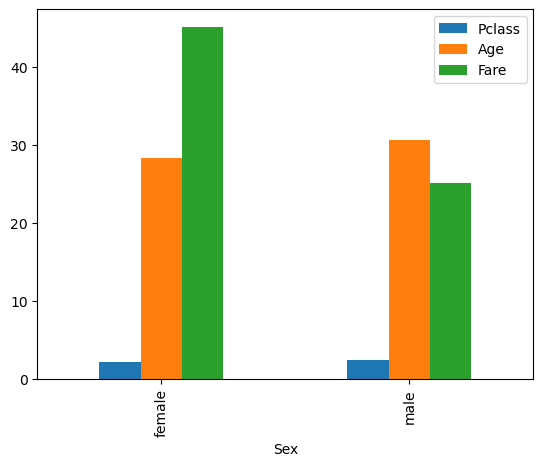

In [112]:
subset.groupby('Sex').mean().plot(kind='bar')

<AxesSubplot:xlabel='Sex'>

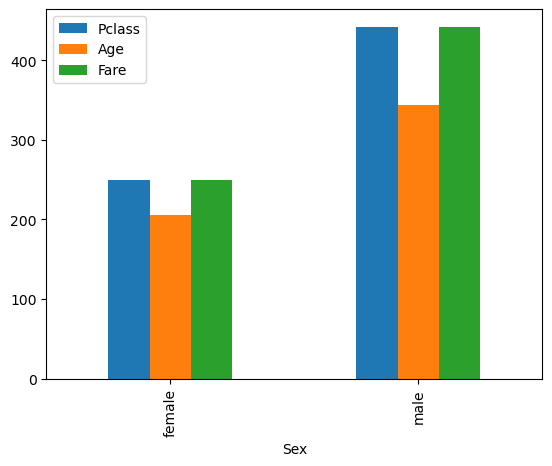

In [43]:
#subset.groupby('Sex').count().plot(kind='bar')

### Another Case Study

In [113]:
import pandas as pd
sales = pd.read_csv("sales_data_with_stores.csv")
sales.head()

store product_group  product_code  stock_qty    cost    price  \
0  Violet           PG2          4187        498  420.76   569.91   
1    Rose           PG2          4195        473  545.64   712.41   
2  Violet           PG2          4204        968  640.42   854.91   
3   Daisy           PG2          4219        241  869.69  1034.55   
4   Daisy           PG2          4718       1401   12.54    26.59   

   last_week_sales  last_month_sales  
0               13                58  
1               16                58  
2               22                88  
3               14                45  
4               50               285

**Example 1: Single aggregation**

We can calculate the average stock quantity for each store as follows:

In [119]:
sales.groupby("store")["stock_qty",'price']].mean()


C:\Users\Ravinder.Ahuja\AppData\Local\Temp\ipykernel_26284\682035703.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales.groupby("store")[["stock_qty"],['price']].mean()


TypeError: unhashable type: 'list'

**Example 2: Multiple aggregations**

We can do multiple aggregations in a single operation. Here is how we can calculate the average stock quantity and price for each store.

In [115]:
sales.groupby("store")[["stock_qty","price"]].mean()


stock_qty      price
store                          
Daisy    1811.861702  69.327426
Rose     1677.680000  60.513700
Violet  14622.406061  67.808727

**Make sure to write the columns to be aggregated in a Python list.**



**Example 3: Multiple aggregations — 2**

We can also use the agg function for calculating multiple aggregate values.

In [120]:
sales.groupby("store")["stock_qty"].agg(["mean", "max"])


mean      max
store                        
Daisy    1811.861702    52748
Rose     1677.680000    19483
Violet  14622.406061  4104542

**Example 4: Named aggregations**

In the previous two examples, it’s not clear what the aggregate columns represent. For instance, “mean” does not tell us it is the mean of stock quantity. In such cases, we can use named aggregations.

In [121]:
sales.groupby("store").agg(
    
    avg_stock_qty = ("stock_qty", "mean"),
    max_stock_qty = ("stock_qty", "max")
)

avg_stock_qty  max_stock_qty
store                               
Daisy     1811.861702          52748
Rose      1677.680000          19483
Violet   14622.406061        4104542

**The column to be aggregated and the function name are written in a tuple.**

**Example 5: Multiple aggregations and multiple functions**

In [122]:
sales.groupby("store")[["stock_qty","price"]].agg(["mean", "max"])


stock_qty               price         
                mean      max       mean      max
store                                            
Daisy    1811.861702    52748  69.327426  1201.75
Rose     1677.680000    19483  60.513700   712.41
Violet  14622.406061  4104542  67.808727  1500.05

**Example 6: Named aggregations using different columns**

We can use named aggregations with different columns and functions.

In [123]:
sales.groupby("store").agg(
    
    avg_stock_qty = ("stock_qty", "mean"),
    avg_price = ("price", "mean")
)

avg_stock_qty  avg_price
store                           
Daisy     1811.861702  69.327426
Rose      1677.680000  60.513700
Violet   14622.406061  67.808727

**Example 7: as_index parameter**

If the output of a groupby operation is DataFrame, the group values are shown in the index. We can make them a column in the DataFrame using the as_index parameter.

In [124]:
sales.groupby("store", as_index=False).agg(
    
    avg_stock_qty = ("stock_qty", "mean"),
    avg_price = ("price", "mean")
)

store  avg_stock_qty  avg_price
0   Daisy    1811.861702  69.327426
1    Rose    1677.680000  60.513700
2  Violet   14622.406061  67.808727

**Example 8: Multiple columns for grouping**

Just like we can aggregate multiple columns, we can use multiple columns for grouping.

In [125]:
sales.groupby(["store","product_group"], as_index=False).agg(
   
    avg_sales = ("last_week_sales", "mean")
    
)

store product_group   avg_sales
0    Daisy           PG1   44.000000
1    Daisy           PG2   56.696970
2    Daisy           PG3  117.105263
3    Daisy           PG4   44.541176
4    Daisy           PG5   64.557522
5    Daisy           PG6   99.417391
6     Rose           PG1   23.142857
7     Rose           PG2   67.368421
8     Rose           PG3   73.454545
9     Rose           PG4   43.104478
10    Rose           PG5   86.563636
11    Rose           PG6   73.292683
12  Violet           PG1   28.333333
13  Violet           PG2  129.652174
14  Violet           PG3   93.111111
15  Violet           PG4   50.035714
16  Violet           PG5  106.747126
17  Violet           PG6  157.321839

**A group is generated for each store-product group combination.**



**Example 9: Sorting the output**

We can sort the output based on the aggregated columns using the sort_values function.

In [126]:
sales.groupby(["store","product_group"], as_index=False).agg(
   avg_sales = ("last_week_sales", "mean")
    
).sort_values(by="avg_sales", ascending=False)

store product_group   avg_sales
17  Violet           PG6  157.321839
13  Violet           PG2  129.652174
2    Daisy           PG3  117.105263
16  Violet           PG5  106.747126
5    Daisy           PG6   99.417391
14  Violet           PG3   93.111111
10    Rose           PG5   86.563636
8     Rose           PG3   73.454545
11    Rose           PG6   73.292683
7     Rose           PG2   67.368421
4    Daisy           PG5   64.557522
1    Daisy           PG2   56.696970
15  Violet           PG4   50.035714
3    Daisy           PG4   44.541176
0    Daisy           PG1   44.000000
9     Rose           PG4   43.104478
12  Violet           PG1   28.333333
6     Rose           PG1   23.142857

**The rows are sorted in descending order based on the average sales values.**

**Example 10: Largest n values**

The max function returns the maximum value for each group. If we need the largest n of values, we can use the nlargest function.

In [127]:
# largest 2 values
sales.groupby("store")["last_week_sales"].nlargest(3)

store      
Daisy   413    1883
        231     947
        249     867
Rose    948     883
        263     623
        132     543
Violet  991    3222
        339    2690
        115    2036
Name: last_week_sales, dtype: int64

We can see both the values and the index of their rows, which can be used for accessing the entire row.

**Example 11: Smallest n values**

The nsmallest function returns the n smallest values for each group.

In [128]:
# smallest 2 values
sales.groupby("store")["last_week_sales"].nsmallest(2)

store      
Daisy   23     12
        52     12
Rose    304    12
        320    12
Violet  20     12
        21     12
Name: last_week_sales, dtype: int64

**Example 12: The nth value**

We can also find the nth value in a group. Let’s first sort the sales DataFrame by the store and last month’s sales columns.

In [129]:
sales_sorted = sales.sort_values(by=["store","last_month_sales"], ascending=False, ignore_index=True)

In [131]:
sales_sorted.head(10)

store product_group  product_code  stock_qty   cost  price  \
0  Violet           PG5          7715    4104542   6.82   7.60   
1  Violet           PG6           890      49045  12.98  16.14   
2  Violet           PG6          5820      27563   2.78   5.22   
3  Violet           PG2          1307      44996  31.44  42.74   
4  Violet           PG6           888      38750  11.66  13.29   
5  Violet           PG6          2631      11435   4.72   8.54   
6  Violet           PG6          8239       9771  17.38  20.89   
7  Violet           PG5          4456       6196   4.73   5.22   
8  Violet           PG6          5468      10010   1.54   4.74   
9  Violet           PG6          9844      15423  14.10  26.59   

   last_week_sales  last_month_sales  
0             3222             12353  
1             2690             10145  
2             2036              7955  
3             1772              6394  
4             1490              5882  
5              700              2732  
6              969              2504  
7              638              2021  
8              515              1950  
9              480              1918

We can find the products in each store with the 5th highest last month sales as follows:

In [132]:
sales_sorted.groupby("store").nth(4)


product_group  product_code  stock_qty   cost  price  last_week_sales  \
store                                                                          
Daisy            PG6          3957      10090  26.92  31.34              867   
Rose             PG5          3424       8986   9.68  27.54              390   
Violet           PG6           888      38750  11.66  13.29             1490   

        last_month_sales  
store                     
Daisy               2355  
Rose                1552  
Violet              5882

The output contains the 5th row for each group. Since rows are sorted based on the last month sales values, we get the rows with 5th highest last month sales.

**Example 13: The nth with negative index**

We can use the nth with negative values as well. For instance, “nth(-2)” returns the second rows from the end.

In [133]:
sales_sorted.groupby("store").nth(-2)


product_group  product_code  stock_qty   cost   price  last_week_sales  \
store                                                                           
Daisy            PG4          2279        525   1.34    1.23               14   
Rose             PG5          9835         39  61.44  104.41               13   
Violet           PG5          2987       2266   7.15   28.49               13   

        last_month_sales  
store                     
Daisy                 18  
Rose                  22  
Violet                20

**Example 14: Unique values**

The unique function can be used for finding the unique values in each group. For instance, we can find the unique product codes in each group as follows:

In [134]:
s1=sales.groupby("store", as_index=False).agg(
   unique_values = ("product_code","unique")
)

In [135]:
s1

store                                      unique_values
0   Daisy  [4219, 4718, 5634, 2650, 5647, 5693, 5696, 569...
1    Rose  [4195, 4724, 4732, 4867, 3997, 5751, 4670, 467...
2  Violet  [4187, 4204, 5630, 5631, 5649, 4721, 5684, 569...

In [66]:
pd.set_option('display.max_columns', None)


In [136]:
s1['unique_values']

0    [4219, 4718, 5634, 2650, 5647, 5693, 5696, 569...
1    [4195, 4724, 4732, 4867, 3997, 5751, 4670, 467...
2    [4187, 4204, 5630, 5631, 5649, 4721, 5684, 569...
Name: unique_values, dtype: object

In [137]:
print(*s1['unique_values'], sep = ",")

[4219 4718 5634 2650 5647 5693 5696 5697 5694 4728 4730 4837 5731 5734
 4672 4674 4675 4677 5781 5788 2432 4748 8765 5030 5120 8793 1833 8805
 8817 8831 8839 8841 5212 7004 7040 3959  958 3521 6665 6193 5719 3721
  729 3948 4149  730  732 2846 4260 3445  631  635 2364 2366 1966 1971
  706  709 7841 2491 2492 5990 8992 1814 1659 1746 6466 1847 4876 5728
 5549 3092 5979 1166 3498 7238 7269 7510 8680 6496 5617 3558 3530 9764
 9765 9766  752 7444 7445 7447 7448 7450 7451 2093 8242 9701 2589 7449
 1668 2481 2463 1745 1747 1748 1750 1751 1753 1757 3957 2390 2392 2596
 2629 9621 4223 4230 4231 5074 7457 7464 7465 7467 7469 7483 7484 2751
 7500 7502 7919 5829 5842 1915 4553 8330 2570 1562 1565 1574  774 8235
 9373 2026 7714 3431 3438 7127 6802 8703 4120 4123 4124 4125 8717 8718
 8719  889 4936 9739 9767 4971 4976 9422 4982 5000 1942 5023 5054 5055
 5059 5062 6078 6858 7957 8836 8842 7201 1906 9712 9733 9071 2177 2178
 2179 2180 2185 2516 2520 2522 2633 8784 1324 8104 8105 8106 8362  856
 8866 

**Example 15: Number of unique values**

We can also find the number of unique values in each group using the nunique function.

In [138]:
sales.groupby("store", as_index=False).agg(
   number_of_unique_values = ("product_code","nunique")
)

store  number_of_unique_values
0   Daisy                      461
1    Rose                      200
2  Violet                      326

**Example 16: Lambda expressions**

We can use lambda expressions as aggregations in the agg function.

In [140]:
sales.groupby("store").agg(
    
    total_sales_in_thousands = (
        "last_month_sales", 
        lambda x: round(x.sum() / 1000, 2)
    )
    
)

total_sales_in_thousands
store                           
Daisy                     115.53
Rose                       47.36
Violet                    119.12

**Example 17: Lambda expressions with apply**

Lambda expressions can be applied to each group using the apply function. For instance, we can calculate the average of the difference between the last week sales and one fourth of the last month sales for each store as follows:

In [141]:
sales.groupby("store").apply(
    lambda x: (x.last_week_sales - x.last_month_sales / 4).mean()
)

store
Daisy     5.094149
Rose      5.326250
Violet    8.965152
dtype: float64

**Example 18: How many groups**

We sometimes need to know how many groups are generated, which can be found using the ngroups method.

In [142]:
sales.groupby(["store", "product_group"]).ngroups


18

**Example 19: Getting a particular group**

The get_group function can be used for getting a particular group as a DataFrame. Groups are defined with the values in the column used for grouping. In the case of using multiple columns for grouping, the values are written in a tuple.

For instance, we can get the rows that belong to store “Daisy” and product group “PG1” as follows:

In [143]:
daisy_pg1 = sales.groupby(
    ["store", "product_group"]
).get_group(("Daisy","PG1"))
daisy_pg1.head()

store product_group  product_code  stock_qty    cost   price  \
124  Daisy           PG1          3445       1594    5.61   13.29   
368  Daisy           PG1          7957        320  459.80  750.41   
405  Daisy           PG1          1324        831   12.54   18.99   
458  Daisy           PG1          5167        980   63.25  106.31   
468  Daisy           PG1          1112        792   26.40   57.94   

     last_week_sales  last_month_sales  
124              100               418  
368               21               100  
405               36               115  
458               64               203  
468               44               146